In [1]:
import pandas as pd
import movie_database_methods as imd
import get_imdb
import seaborn as sns

In [2]:
imdb = get_imdb.get_imdb()

In [3]:
tn = imd.tn_movie_budgets()

In [4]:
tn.loc[tn['movie'] == 'On the Road']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2316,17,"Mar 22, 2013",On the Road,25000000.0,720828.0,9313302.0


In [25]:
unique_genres= ['Action','Crime','Drama','Biography','Comedy','Fantasy','Horror','Thriller','Adventure','Animation',
'Documentary','History','Mystery','Sci-Fi','Romance','Family','War','Music','Sport','Western','Musical','Adult','News',
 'Talk-Show','Reality-TV','Game-Show','Short']

In [6]:
unique_genres

['Action',
 'Crime',
 'Drama',
 'Biography',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'Documentary',
 'History',
 'Mystery',
 'Sci-Fi',
 'Romance',
 'Family',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical',
 'Adult',
 'News',
 'Talk-Show',
 'Reality-TV',
 'Game-Show',
 'Short']

In [7]:
combined = imd.movies_combined(tn,imdb)

In [21]:
combined = combined.loc[combined['start_year'] < 2019]

In [153]:
combined.head(5)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,Biography,...,Short,id,release_date,production_budget,domestic_gross,worldwide_gross,release_month,day_of_year,num_genres,profit
20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",True,False,False,False,...,False,26,2012-12-31,45000000.0,0.0,73706.0,12,366,3,-45000000.0
48,tt0337692,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]",False,False,True,False,...,False,17,2013-03-22,25000000.0,720828.0,9313302.0,3,81,3,-24279172.0
39490,tt2404548,On the Road,On the Road,2011,90.0,[Drama],False,False,True,False,...,False,17,2013-03-22,25000000.0,720828.0,9313302.0,3,81,1,-24279172.0
68078,tt3872966,On the Road,On the Road,2013,87.0,[Documentary],False,False,False,False,...,False,17,2013-03-22,25000000.0,720828.0,9313302.0,3,81,1,-24279172.0
76007,tt4339118,On the Road,On the Road,2014,89.0,[Drama],False,False,True,False,...,False,17,2013-03-22,25000000.0,720828.0,9313302.0,3,81,1,-24279172.0


In [107]:
num_genres_list = [] 
for i in list(combined.genres):
    num_genres_list.append(len(i))

In [109]:
combined['num_genres'] = num_genres_list

/home/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
combined.loc[combined['Action'] == 'True'].groupby('start_year').describe()['domestic_gross']['std']

# .groupby('start_year').describe()['domestic_gross']

start_year
2010    6.761614e+07
2011    7.211713e+07
2012    1.129526e+08
2013    9.043827e+07
2014    9.177011e+07
2015    1.152640e+08
2016    1.035344e+08
2017    1.013294e+08
2018    1.590454e+08
Name: std, dtype: float64

In [126]:
total_rev = combined.domestic_gross.sum()

In [127]:
genre_perc_rev = pd.Series()

In [128]:
genre_perc_rev

Series([], dtype: float64)

In [129]:
perc_revs = []

for genre in unique_genres:
    sub_by_genre = combined.loc[combined[genre] == 'True']
    weighted_rev = sub_by_genre.domestic_gross/sub_by_genre.num_genres
    perc_of_total = weighted_rev.sum()/total_rev*100
    perc_revs.append(perc_of_total)
    print(genre + ' accounts for ' + str(perc_of_total) + '% of revenue')

Action accounts for 11.232032818335098% of revenue
Crime accounts for 3.1001178488529892% of revenue
Drama accounts for 17.72096287622832% of revenue
Biography accounts for 2.1016934225652846% of revenue
Comedy accounts for 11.76509571862097% of revenue
Fantasy accounts for 3.7184703286777934% of revenue
Horror accounts for 4.117473413418098% of revenue
Thriller accounts for 5.620430526617272% of revenue
Adventure accounts for 11.740096933596988% of revenue
Animation accounts for 4.170698645427073% of revenue
Documentary accounts for 7.525582588756606% of revenue
History accounts for 0.846173488458372% of revenue
Mystery accounts for 1.931953862058201% of revenue
Sci-Fi accounts for 4.796580924177018% of revenue
Romance accounts for 2.951860796952472% of revenue
Family accounts for 3.5976851176758293% of revenue
War accounts for 0.41742752064344146% of revenue
Music accounts for 0.8316242908840542% of revenue
Sport accounts for 0.6933133271718148% of revenue
Western accounts for 0.2383

In [122]:
combined['genres'].value_counts()

[Drama]                             390
[Documentary]                       226
[Comedy]                            120
[Comedy, Drama]                      86
[Drama, Romance]                     76
[Comedy, Drama, Romance]             75
[Horror]                             69
[Adventure, Animation, Comedy]       67
[Thriller]                           58
[Comedy, Romance]                    54
[Action, Crime, Drama]               53
[Action, Adventure, Sci-Fi]          51
[Drama, Thriller]                    47
[Horror, Thriller]                   43
[Horror, Mystery, Thriller]          40
[Action, Comedy, Crime]              34
[Crime, Drama, Thriller]             34
[Action, Adventure, Fantasy]         33
[Action]                             31
[Action, Adventure, Drama]           29
[Crime, Drama]                       28
[Action, Crime, Thriller]            27
[Action, Adventure, Comedy]          27
[Drama, Mystery, Thriller]           26
[Biography, Drama, History]          25


In [114]:
perc_rev_by_genre = pd.DataFrame(perc_revs, unique_genres).reset_index()

In [115]:
perc_rev_by_genre.columns = ['genre', 'perc_rev']

In [116]:
perc_rev_by_genre.perc_rev.sum()

100.00000000000001

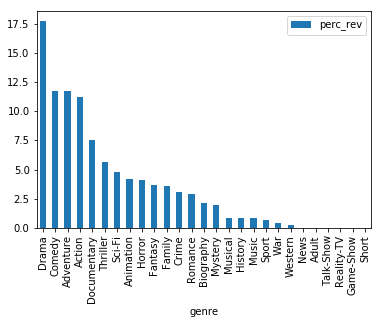

In [117]:
perc_rev_by_genre.sort_values(by = 'perc_rev', ascending = False).plot(kind = 'bar', x = 'genre')

In [123]:
combined['profit'] = (combined.domestic_gross - combined.production_budget)

/home/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
total_profit = combined['profit'].sum()

In [160]:
perc_profit = []

for genre in unique_genres:
    sub_by_genre = combined.loc[combined[genre] == 'True']
    weighted_profit = sub_by_genre.profit/sub_by_genre.num_genres
    norm_profit = weighted_profit.sum()/len(sub_by_genre)
#     perc_of_total = weighted_profit.sum()/total_profit*100
    perc_profit.append(norm_profit)
#     print(genre + ' accounts for ' + str(perc_of_total) + '% of profit')

/home/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [161]:
perc_profit_by_genre = pd.DataFrame(perc_profit, unique_genres).reset_index()

In [162]:
perc_profit_by_genre

,index,0
0,Action,2.261564e+06
1,Crime,1.507416e+06
2,Drama,2.777895e+06
3,Biography,3.529647e+06
4,Comedy,6.491057e+06
5,Fantasy,5.289219e+06
6,Horror,6.334274e+06
7,Thriller,2.328125e+06
8,Adventure,7.020652e+06
9,Animation,1.351470e+07


In [163]:
perc_profit_by_genre.columns = ['genre', 'perc_profit']

In [164]:
perc_profit_by_genre.perc_profit.sum()

110186274.3798806

In [165]:
combined['profit'].sum()/combined['domestic_gross'].sum()

0.20589537236160232

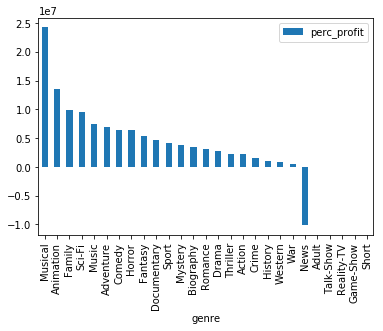

In [166]:
perc_profit_by_genre.sort_values(by = 'perc_profit', ascending = False).plot(kind = 'bar', x = 'genre')

In [212]:
combined['profit_margin'] = (combined['domestic_gross'] - combined['production_budget'])/combined['domestic_gross']

/home/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [219]:
combined['profit_margin'][20]

numpy.float64

In [223]:
float('inf')

inf

In [237]:
combined.loc[(combined['Action'] == 'True') & (combined['profit_margin'] != -float('inf')), 'profit_margin']

58          -0.076191
60           0.670382
73          -2.764098
76           0.654440
95          -0.424463
99          -0.287102
126          0.129040
131          0.636420
139          0.458292
141          0.207493
172         -0.089093
174         -0.459403
185         -0.164745
141374      -0.164745
190          0.278588
194         -0.611134
196         -0.059707
199          0.278724
209         -0.162875
246          0.226925
269          0.250663
270         -2.866878
278          0.234138
281          0.171411
283         -2.387989
309          0.477317
312          0.061078
319         -1.059264
326         -0.250181
329          0.202695
             ...     
87402        0.233362
101136       0.233362
87777        0.399950
91517      -17.397120
91710       -0.272907
91753        0.509422
92752       -5.540411
93752        0.661113
94701        0.496372
97960       -2.624618
98507       -0.826948
99852       -1.236090
128810       0.631440
104877       0.812919
105597    

In [234]:
combined.loc[(combined[genre] == 'True') & (combined['profit_margin'] == -float('inf')), 'profit_margin']

Series([], Name: profit_margin, dtype: float64)

In [274]:
norm_profit_list = []
avg_profit_margin_list = []

for genre in unique_genres:
    norm_profit = combined.loc[combined[genre] == 'True', 'profit'].sum()/len(combined.loc[combined[genre] == 'True'])
    profit_margin = combined.loc[(combined[genre] == 'True') & (combined['profit_margin'] != -float('inf')), 'profit_margin']
    avg_profit_margin = profit_margin.mean()
    avg_profit_margin_list.append(avg_profit_margin)
    norm_profit_list.append(norm_profit)

/home/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [275]:
len(norm_profit_list)

27

In [276]:
len(avg_profit_margin_list)

27

In [277]:
len(unique_genres)

27

In [278]:
norm_profit_by_genre = pd.DataFrame(norm_profit_list, unique_genres).reset_index()

In [279]:
norm_profit_by_genre['profit_margin'] = avg_profit_margin_list

In [280]:
norm_profit_by_genre.columns = ['genre', 'norm_profit']

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [281]:
norm_profit_by_genre

,index,0,profit_margin
0,Action,7.060438e+06,-52.915260
1,Crime,3.200371e+06,-87.109079
2,Drama,5.610587e+06,-58.407741
3,Biography,9.871619e+06,-14.593125
4,Comedy,1.504966e+07,-85.361531
5,Fantasy,1.176244e+07,-28.406077
6,Horror,1.104082e+07,-55.023922
7,Thriller,5.753054e+06,-57.784707
8,Adventure,1.827788e+07,-31.068442
9,Animation,3.520593e+07,-70.990307


In [209]:
norm_profit_by_genre.norm_profit.sum()

250318748.56991303

In [210]:
combined['profit'].sum()/combined['domestic_gross'].sum()

0.20589537236160232

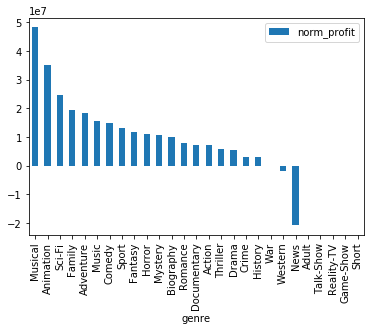

In [211]:
norm_profit_by_genre.sort_values(by = 'norm_profit', ascending = False).plot(kind = 'bar', x = 'genre')

In [195]:
combined.loc[combined['Musical'] == 'True']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Crime,Drama,Biography,...,Short,id,release_date,production_budget,domestic_gross,worldwide_gross,release_month,day_of_year,num_genres,profit
646,tt10013634,Cinderella,Cinderella,2018,150.0,[Musical],False,False,False,False,...,False,13,2015-03-13,95000000.0,201151353.0,5.345514e+08,3,72,1,106151353.0
97370,tt5684194,Cinderella,Cinderella,2016,130.0,[Musical],False,False,False,False,...,False,13,2015-03-13,95000000.0,201151353.0,5.345514e+08,3,72,1,106151353.0
26279,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,99.0,"[Fantasy, Musical]",False,False,False,False,...,False,51,2010-03-05,200000000.0,334191110.0,1.025491e+09,3,64,2,134191110.0
5625,tt1126591,Burlesque,Burlesque,2010,119.0,"[Drama, Music, Musical]",False,False,True,False,...,False,24,2010-11-24,55000000.0,39440655.0,9.055268e+07,11,328,3,-15559345.0
6474,tt1303803,Standing Ovation,Standing Ovation,2010,105.0,[Musical],False,False,False,False,...,False,11,2010-07-16,5600000.0,531806.0,5.318060e+05,7,197,1,-5068194.0
6788,tt1336608,Rock of Ages,Rock of Ages,2012,123.0,"[Comedy, Drama, Musical]",False,False,True,False,...,False,29,2012-06-15,70000000.0,38518613.0,6.103193e+07,6,167,3,-31481387.0
18594,tt1815799,Beloved,Les bien-aimés,2011,133.0,"[Drama, Musical, Romance]",False,False,True,False,...,False,65,1998-10-16,53000000.0,22852487.0,2.285249e+07,10,289,3,-30147513.0
8163,tt1485796,The Greatest Showman,The Greatest Showman,2017,105.0,"[Biography, Drama, Musical]",False,False,True,True,...,False,25,2017-12-20,84000000.0,174340174.0,3.866656e+08,12,354,3,90340174.0
116784,tt6949172,Bully,Bully,2017,58.0,"[Drama, Musical]",False,False,True,False,...,False,79,2001-07-13,2100000.0,881824.0,1.381824e+06,7,194,2,-1218176.0
14644,tt1720297,Showtime,Yong xin tiao,2010,100.0,"[Drama, Fantasy, Musical]",False,False,True,False,...,False,19,2002-03-15,85000000.0,37948765.0,7.894876e+07,3,74,3,-47051235.0


In [201]:
combined.loc[combined['Action'] == 'True', 'profit'].sum()/len(combined.loc[combined['Action'] == 'True'])

7060437.537931034

In [88]:
tier1 = ['Drama', 'Adventure', 'Action', 'Comedy']

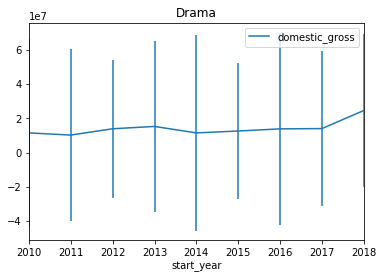

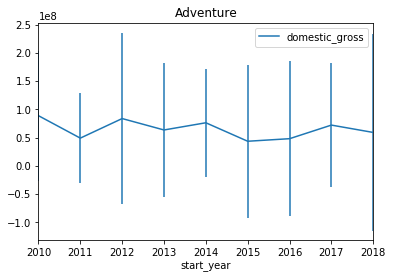

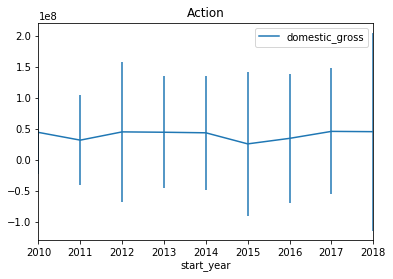

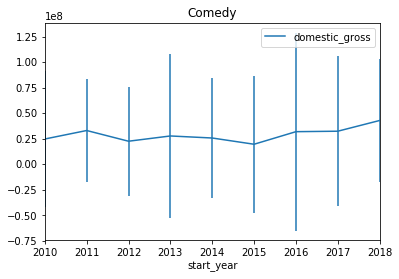

In [89]:
for genre in tier1:

    genre_grouped = combined[combined[genre] == 'True'].groupby('start_year').median()
    year_std = combined.loc[combined[genre] == 'True'].groupby('start_year').describe()['domestic_gross']['std']
    genre_grouped.plot(kind='line', y = 'domestic_gross',title = genre, yerr = year_std)

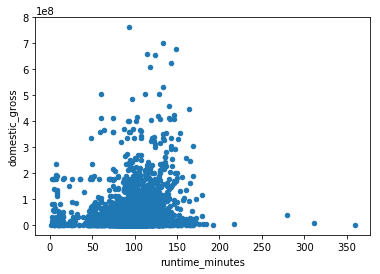

In [106]:
combined.plot(kind = 'scatter', x = 'runtime_minutes', y = 'domestic_gross')

In [107]:
action_combined = combined.loc[combined['Action'] == 'True']

/home/peter/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/peter/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


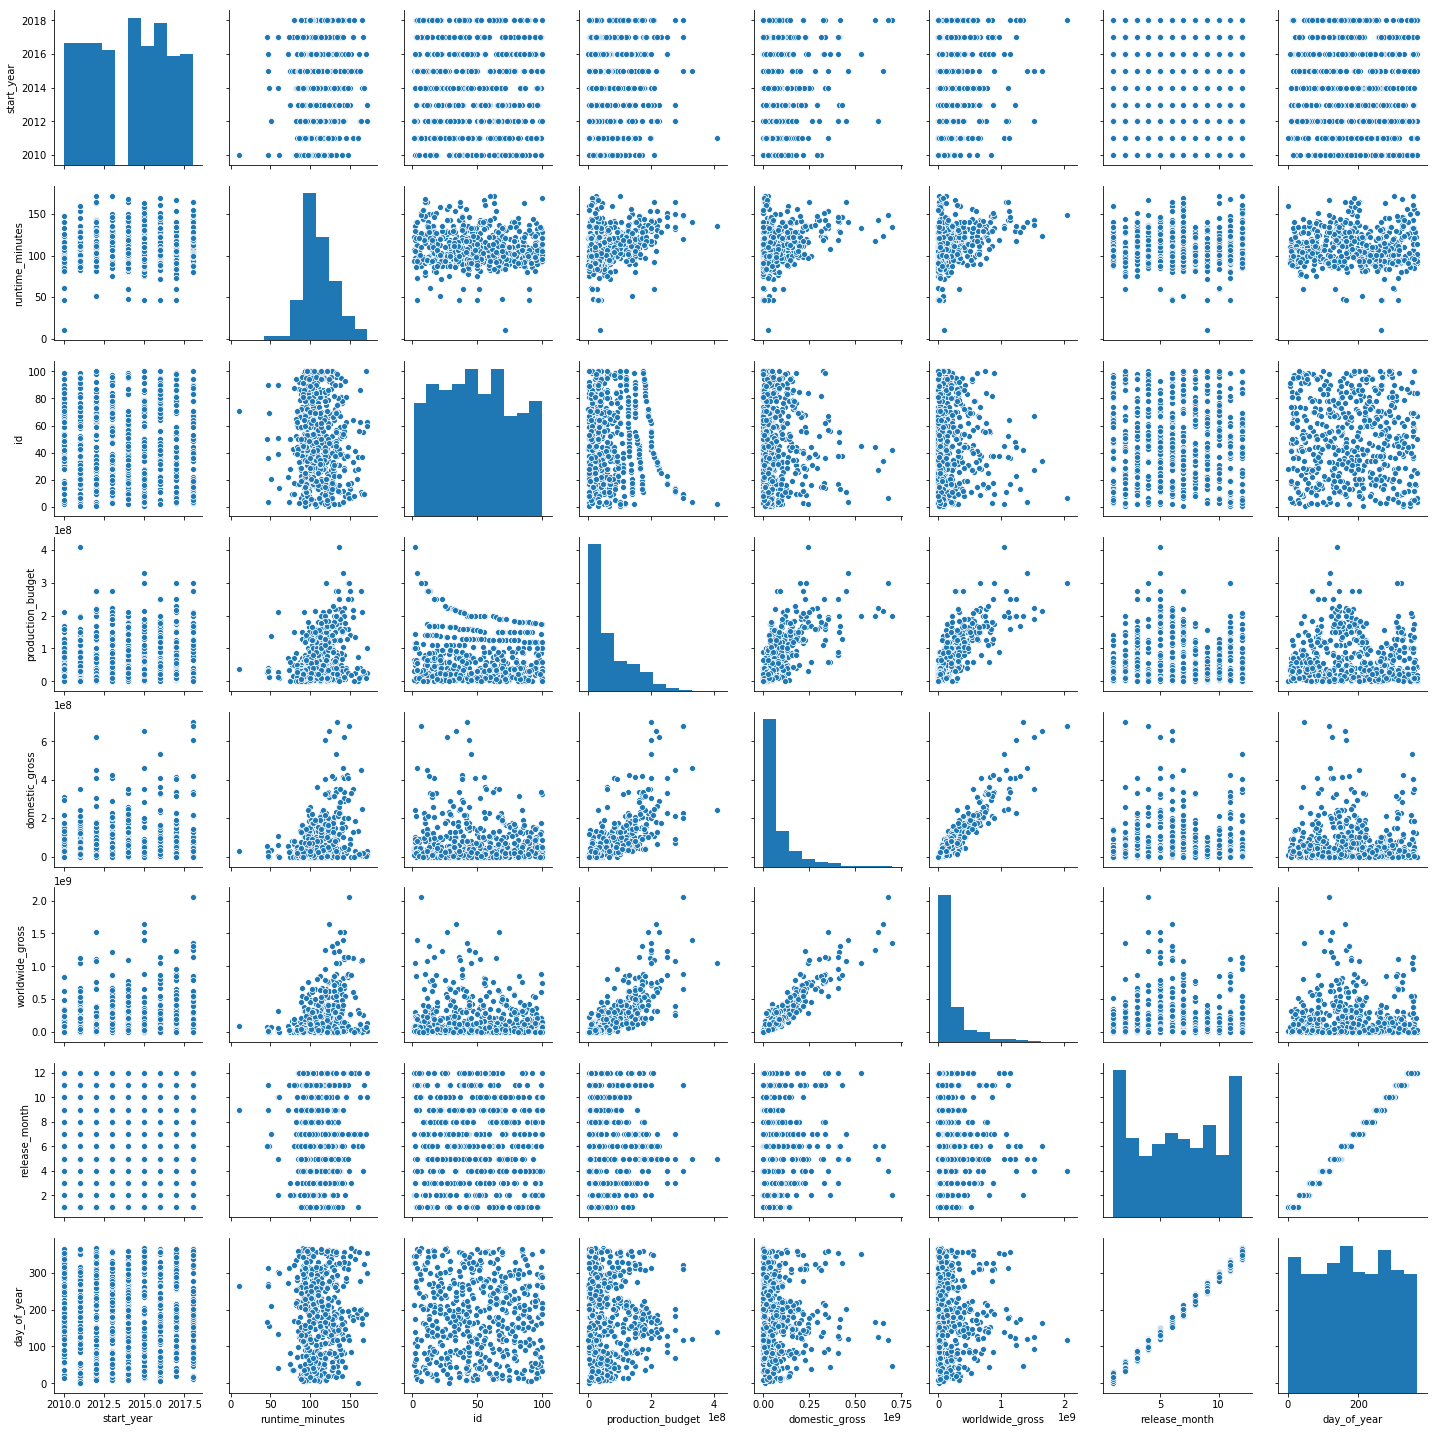

In [108]:
sns.pairplot(action_combined)

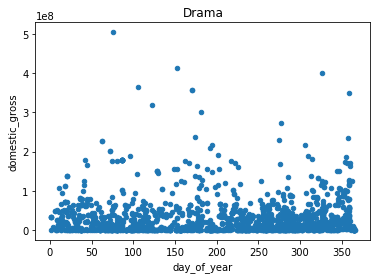

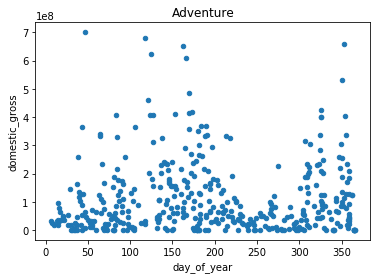

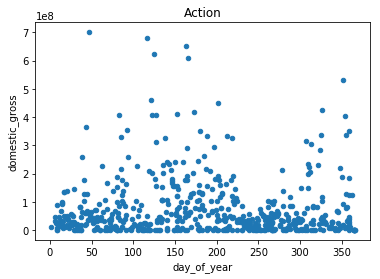

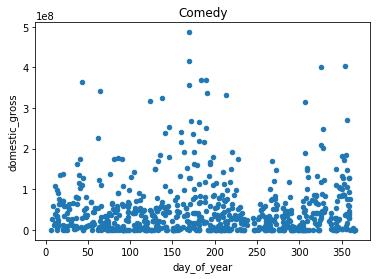

In [101]:
for genre in tier1:
    
    combined.loc[(combined[genre] == 'True')].plot(kind='scatter', x = 'day_of_year',y = 'domestic_gross', 
                                                   title = genre)

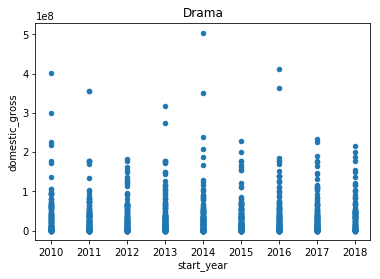

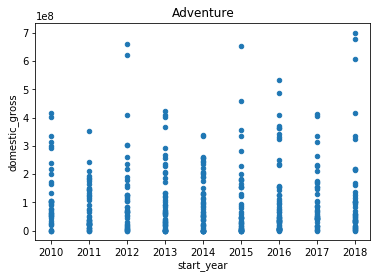

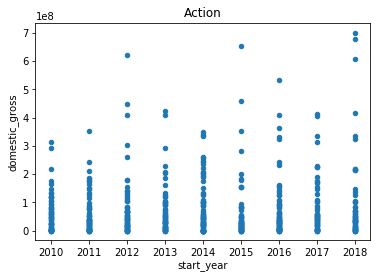

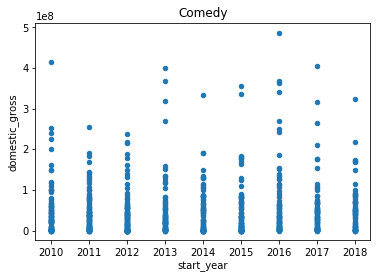

In [93]:
for genre in tier1:
    
    combined.loc[(combined[genre] == 'True')].plot(kind='scatter', x = 'start_year',y = 'domestic_gross',
                                                   title = genre)

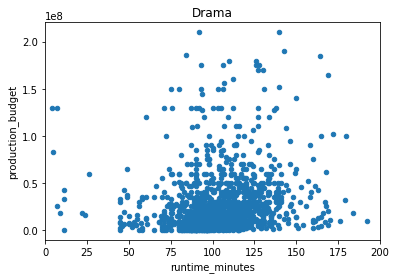

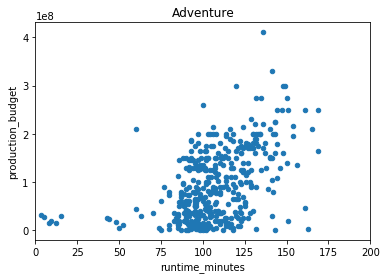

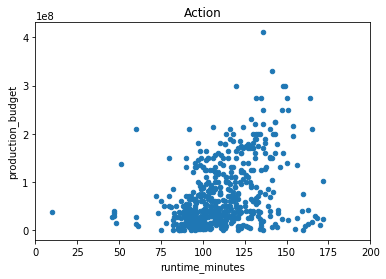

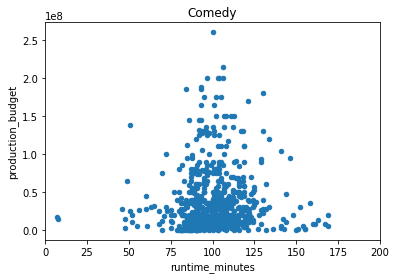

In [94]:
for genre in tier1:
    
    combined.loc[(combined[genre] == 'True')].plot(kind='scatter', x = 'runtime_minutes',y = 'production_budget', 
                                                   title = genre, xlim = (0,200))

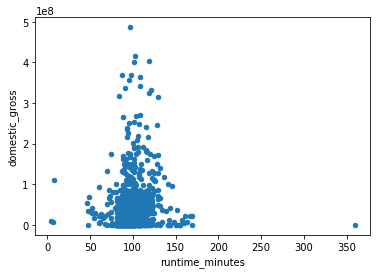

In [79]:
combined.loc[combined['Comedy'] == 'True'].plot(kind='scatter', x = 'runtime_minutes',y = 'domestic_gross')

In [96]:
combined.release_date.dtypes

dtype('O')

In [97]:
combined.release_date = pd.to_datetime(combined.release_date)

/home/peter/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [98]:
combined['release_month'] = combined.release_date.dt.month

/home/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
combined['day_of_year'] = combined.release_date.dt.dayofyear

/home/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


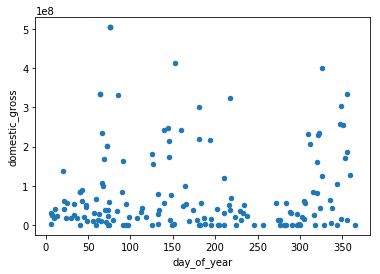

In [100]:
combined.loc[combined['Fantasy'] == 'True'].plot(kind='scatter', x = 'day_of_year' ,y = 'domestic_gross')